<div align="center">
  <b> <font size="6">Binary Classification using Logistic Regression - Excercise</font> </b>
</div>

We will predict whether an employee will retain in the company or not. 

In [50]:
# Import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Step 1: Load the dataset

In [51]:
# Load the dataset into pandas dataframe
df = pd.read_csv("E:\\MY LECTURES\\8.2021-09-03 DATA SCIENCE (KNU)\\3.Programs\\dataset\\HR_comma_sep.csv")     
# Change this location based on the location of dataset in your machine

In [52]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [53]:
df.shape

(14999, 10)

### Step 2: Apply EDA

##### How  many did leave the company?

In [54]:
left = df[df.left==1]
left.shape

(3571, 10)

##### How  many are working in the company?

In [55]:
retained = df[df.left==0]
retained.shape

(11428, 10)

##### Average numbers for all columns based on insurance buy status

In [56]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,
<ol>
    <li>Satisfaction Level: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)</li>
    <li>Average Monthly Hours: Average monthly hours are higher in employees leaving the firm (199 vs 207)</li>
    <li>Promotion Last 5 Years: Employees who are given promotion are likely to be retained at firm </li>
</ol>

##### Impact of salary on employee retention

<AxesSubplot:xlabel='salary'>

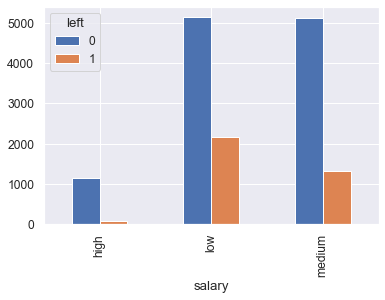

In [57]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

##### Department wise employee retention rate

<AxesSubplot:xlabel='Department'>

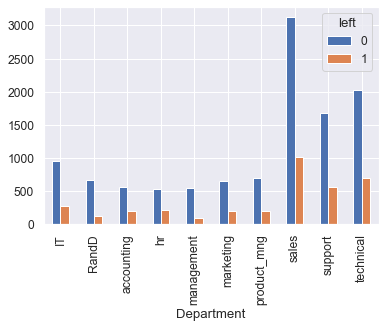

In [58]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

From the data analysis so far we can conclude that we will use following variables as independant variables in our model.
<ol>
    <li>Satisfaction Level</li>
    <li>Average Monthly Hours</li>
    <li>Promotion Last 5 Years</li>
    <li>Salary</li>
</ol>

In [59]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


### Step 3. Pre-process and extract the features

##### Salary feature has text data. So, introduce dummy variables.

In [60]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Now we need to remove salary column which is text data as it is already replaced by dummy variables so we can safely remove it

In [61]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [62]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [63]:
Y = df.left

### Step 4. Split the data for training and testing

In [64]:
# Splitting dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
#x_train, x_test, y_train, y_test = train_test_split(df[["age"]],df.bought_insurance, test_size = 0.2, random_state = 0)

### Step 5. Training the model

##### Fitting the model

In [65]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [66]:
logistic_model.coef_     # slope for each feature in log(odds graph)

array([[-3.75511715e+00,  2.56224368e-03, -1.17584357e+00,
        -1.00460062e+00,  7.46689080e-01,  2.65460078e-01]])

In [67]:
y_train_pred = logistic_model.predict(x_train) 
y_train_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

##### Logistic regression results either 0 or 1 but what could be the calculated value before rounding?

In [68]:
train_predicted_prob = logistic_model.predict_proba(x_train)
train_predicted_prob

array([[0.87817064, 0.12182936],
       [0.46180007, 0.53819993],
       [0.76783801, 0.23216199],
       ...,
       [0.84129841, 0.15870159],
       [0.965606  , 0.034394  ],
       [0.69888883, 0.30111117]])

First column is 0 (will not leave), second column is 1 (will will leave). <br>
Look at the next cell for the input of following output

##### Performance score for logistic regression

In [69]:
out = logistic_model.score(x_train,y_train)
Logistic_Train_RS = np.round(out,2)*100
print("Performance score for training set :",Logistic_Train_RS,"%") 

Performance score for training set : 78.0 %


##### Confusion matrix

R2 score says the performance of logistic regression over simple probability that does not feature Age. <br>
We are interested to know how many has been correctly and wrongly classified.

Text(19.5, 0.5, 'Truth')

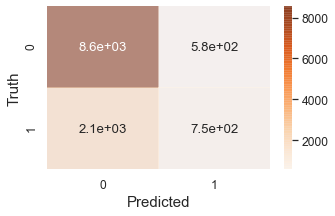

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_train_pred) 

plt.figure(figsize = (5,3))
sns.set(font_scale=1.1)

axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15) 

sns.heatmap(cm, annot=True,cmap=plt.cm.Oranges, alpha=0.5)

plt.xlabel('Predicted')
plt.ylabel('Truth')

##### Precison, Recall, F1, Accuracy

In [71]:
# Total report
from sklearn import metrics
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      9129
           1       0.57      0.26      0.36      2870

    accuracy                           0.78     11999
   macro avg       0.68      0.60      0.61     11999
weighted avg       0.74      0.78      0.74     11999



In [72]:
# Accuracy score
temp = metrics.accuracy_score(y_train,y_train_pred)
Logistic_Train_Accuracy = np.round(temp,2)*100
print("Accuracy score : ",Logistic_Train_Accuracy,"%")

Accuracy score :  78.0 %


In [73]:
# Precision score
temp = metrics.precision_score(y_train,y_train_pred)
Logistic_Train_Precision = np.round(temp,2)*100
print("Precision score : ",Logistic_Train_Precision,"%")

Precision score :  56.99999999999999 %


In [74]:
# Recall score
temp = metrics.recall_score(y_train,y_train_pred)
Logistic_Train_Recall = np.round(temp,2)*100
print("Recall score : ",Logistic_Train_Recall,"%")

Recall score :  26.0 %


In [75]:
# F1 score
temp = metrics.f1_score(y_train,y_train_pred)
Logistic_Train_F1 = np.round(temp,2)*100
print("F1 score : ",Logistic_Train_F1,"%")

F1 score :  36.0 %


In [76]:
# Cohen Kappa score
temp = metrics.cohen_kappa_score(y_train,y_train_pred)
Logistic_Train_CK = np.round(temp,2)*100
print("Cohen Kappa score : ",Logistic_Train_CK,"%")

Cohen Kappa score :  24.0 %


##### ROC and AUC

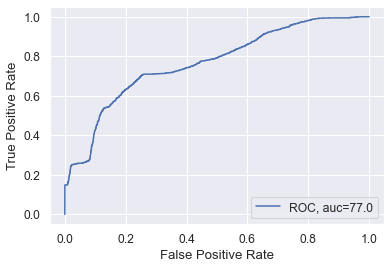

In [77]:
prob = train_predicted_prob[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train, prob)
Logistic_Train_AUC = np.round(metrics.roc_auc_score(y_train, prob),2)*100
plt.plot(fpr,tpr,label="ROC, auc="+str(Logistic_Train_AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Step 6. Testing the model

In [78]:
# Predicting values for test input set
y_test_pred = logistic_model.predict(x_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [79]:
test_predicted_prob = logistic_model.predict_proba(x_test)
test_predicted_prob
# First column is 0 (will not buy) second column is 1 (will buy)

array([[0.73720393, 0.26279607],
       [0.78730394, 0.21269606],
       [0.8705831 , 0.1294169 ],
       ...,
       [0.6810017 , 0.3189983 ],
       [0.68875328, 0.31124672],
       [0.43330018, 0.56669982]])

##### Performance score for logistic regression

In [80]:
out = logistic_model.score(x_test,y_test)
Logistic_Test_RS = np.round(out,2)*100
print("Performance score for training set :",Logistic_Test_RS,"%") 

Performance score for training set : 78.0 %


##### Confusion matrix

R2 score says the performance of logistic regression over simple probability that does not feature Age. <br>
We are interested to know how many has been correctly and wrongly classified.

Text(19.5, 0.5, 'Truth')

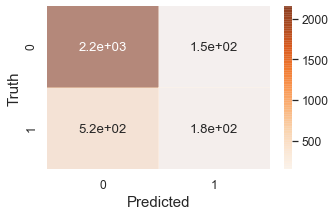

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize = (5,3))
sns.set(font_scale=1.1)

axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15) 

sns.heatmap(cm, annot=True,cmap=plt.cm.Oranges, alpha=0.5)

plt.xlabel('Predicted')
plt.ylabel('Truth')

##### Precison, Recall, F1, Accuracy

In [82]:
# Total report
from sklearn import metrics
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      2299
           1       0.55      0.26      0.35       701

    accuracy                           0.78      3000
   macro avg       0.68      0.60      0.61      3000
weighted avg       0.75      0.78      0.74      3000



In [83]:
# Accuracy score
temp = metrics.accuracy_score(y_test,y_test_pred)
Logistic_Test_Accuracy = np.round(temp,2)*100
print("Accuracy score : ",Logistic_Test_Accuracy,"%")

Accuracy score :  78.0 %


In [84]:
# Precision score
temp = metrics.precision_score(y_test,y_test_pred)
Logistic_Test_Precision = np.round(temp,2)*100
print("Precision score : ",Logistic_Test_Precision,"%")

Precision score :  55.00000000000001 %


In [85]:
# Recall score
temp = metrics.recall_score(y_test,y_test_pred)
Logistic_Test_Recall = np.round(temp,2)*100
print("Recall score : ",Logistic_Test_Recall,"%")

Recall score :  26.0 %


In [86]:
# F1 score
temp = metrics.f1_score(y_test,y_test_pred)
Logistic_Test_F1 = np.round(temp,2)*100
print("F1 score : ",Logistic_Test_F1,"%")

F1 score :  35.0 %


In [87]:
# Cohen Kappa score
temp = metrics.cohen_kappa_score(y_test,y_test_pred)
Logistic_Test_CK = np.round(temp,2)*100
print("Cohen Kappa score : ",Logistic_Test_CK,"%")

Cohen Kappa score :  24.0 %


##### ROC and AUC

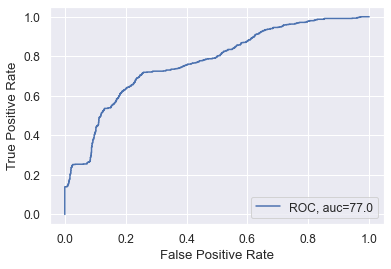

In [88]:
prob = test_predicted_prob[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, prob)
Logistic_Test_AUC = np.round(metrics.roc_auc_score(y_test, prob),2)*100
plt.plot(fpr,tpr,label="ROC, auc="+str(Logistic_Test_AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Step 7. Prediction using the model

Given satisfaction_level, average_montly_hours, promotion_last_5years, salary_high, salary_low, salary_medium as => 0, 0.38, 157, 0, 0, 1, predict an employee will continue job in the company.

In [89]:
logistic_model.predict([[0,0.38,157,0,0,1]])

array([0], dtype=int64)

### Step 8. Summary

In [90]:
print("             Logistic Regression      ")
print("====================================================")
print("\t\tTraining phase       Testing phase ")
print("====================================================")
print("RS\t\t   ",Logistic_Train_RS,"%\t\t", Logistic_Test_RS,"%") 
print("Accuracy\t   ",Logistic_Train_Accuracy,"%\t\t", Logistic_Test_Accuracy,"%") 
print("Precision\t   ",Logistic_Train_Precision,"%\t\t", Logistic_Test_Precision,"%") 
print("Recall\t\t   ",Logistic_Train_Recall,"%\t\t", Logistic_Test_Recall,"%") 
print("F1\t\t   ",Logistic_Train_F1,"%\t\t", Logistic_Test_F1,"%") 
print("CK\t\t   ",Logistic_Train_CK,"%\t\t", Logistic_Test_CK,"%") 
print("AUC\t\t   ",Logistic_Train_AUC,"%\t\t", Logistic_Test_AUC,"%") 
print("====================================================")

             Logistic Regression      
		Training phase       Testing phase 
RS		    78.0 %		 78.0 %
Accuracy	    78.0 %		 78.0 %
Precision	    56.99999999999999 %		 55.00000000000001 %
Recall		    26.0 %		 26.0 %
F1		    36.0 %		 35.0 %
CK		    24.0 %		 24.0 %
AUC		    77.0 %		 77.0 %
